# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Let us Import and Explore the Dataset

In [2]:
data = pd.read_csv("Telecom Churn dataset.csv",na_values=[' '])

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
data.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
data.shape
print("No of records:", data.shape[0])
print("No of Attributes:", data.shape[1])

No of records: 7043
No of Attributes: 21


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [9]:
data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [11]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

# Missing Value Treatment

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

TotalCharges        0.156183
customerID          0.000000
DeviceProtection    0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
OnlineBackup        0.000000
gender              0.000000
OnlineSecurity      0.000000
InternetService     0.000000
MultipleLines       0.000000
PhoneService        0.000000
tenure              0.000000
Dependents          0.000000
Partner             0.000000
SeniorCitizen       0.000000
Churn               0.000000
dtype: float64

In [14]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
data['TotalCharges'] = np.where(data['TotalCharges'].isnull(), 0, data['TotalCharges'])

We replace the null values in TotalCharges by 0 because the data which have null values in TotalCharges have value 0 in the column tenure. That means the customer is new and didnt completed a month of service and hence the billing cycle is not generated yet. As we see, the TotalCharges column is the multiple of tenure and MonthlyCharges, so it makes sense to convert the null values to 0 since the tenure is zero.

In [16]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Feature Selection

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
del data['customerID']

In [19]:
data.shape

(7043, 20)

# Feature Engineering

In [20]:
data=pd.get_dummies(data, drop_first=True)

In [21]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [22]:
data.shape

(7043, 31)

In [23]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [24]:
data['Churn_Yes'].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [25]:
# Balance the Data

In [26]:
#pip install imblearn

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=2)

In [29]:
x=data.drop(columns=['Churn_Yes'])
y=data['Churn_Yes']
x,y = ros.fit_resample(x,y)

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, random_state=2)

In [31]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(8278, 30) (2070, 30) (8278,) (2070,)


## Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=500)

In [33]:
model_lr.fit(train_x,train_y)

LogisticRegression(max_iter=500)

In [34]:
# Hard predictions
pred_y_lr=model_lr.predict(test_x)

In [35]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_y_lr}).head(20)

,Actual,Predicted
1545,0,0
4432,0,0
8659,1,1
10259,1,1
8792,1,0
7141,1,0
6044,0,1
3351,1,0
8601,1,1
4943,0,0


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score

In [37]:
def validation(actual,pred):
    print('Confusion Matrix\n',confusion_matrix(actual,pred))
    print('\nAccuracy:',accuracy_score(actual,pred))
    print('\nRecall :',recall_score(actual,pred))
    print('\nPrecision :',precision_score(actual,pred))
    print('\nF1 Score :',f1_score(actual,pred))

In [38]:
validation(test_y,pred_y_lr)

Confusion Matrix
 [[757 283]
 [214 816]]

Accuracy: 0.759903381642512

Recall : 0.7922330097087379

Precision : 0.7424931756141947

F1 Score : 0.7665570690465008


## ROC Curve

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
auc=roc_auc_score(test_y,pred_y_lr)

In [40]:
auc

0.7600588125466766

In [41]:
# Soft Predictions

In [42]:
pred_y_lr_soft=model_lr.predict_proba(test_x)

In [43]:
pred_y_lr_soft=pred_y_lr_soft[:,1]

In [44]:
pred_y_lr_soft

array([0.31105171, 0.08762655, 0.65023957, ..., 0.46517678, 0.3330799 ,
       0.88408145])

In [45]:
pd.DataFrame({'Actual':test_y,'Predicted':pred_y_lr,'Soft Pred':pred_y_lr_soft}).head(20)

,Actual,Predicted,Soft Pred
1545,0,0,0.311052
4432,0,0,0.087627
8659,1,1,0.650240
10259,1,1,0.798312
8792,1,0,0.224754
7141,1,0,0.457721
6044,0,1,0.805307
3351,1,0,0.385586
8601,1,1,0.856791
4943,0,0,0.039407


In [46]:
fpr,tpr,thrshold=roc_curve(test_y, pred_y_lr_soft)

In [47]:
roc_df=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thrshold})

In [48]:
roc_df.sort_values(by=['TPR'],ascending=False)

,TPR,FPR,Threshold
813,1.000000,1.000000,0.004719
812,1.000000,0.921154,0.015448
811,0.999029,0.921154,0.015481
810,0.999029,0.889423,0.025047
809,0.998058,0.889423,0.025227
...,...,...,...
4,0.006796,0.000000,0.931738
3,0.004854,0.000000,0.938907
2,0.002913,0.000000,0.942002
1,0.000971,0.000000,0.948560


LR AUC 0.7600588125466766 LR Model Score 0.7623822179270355


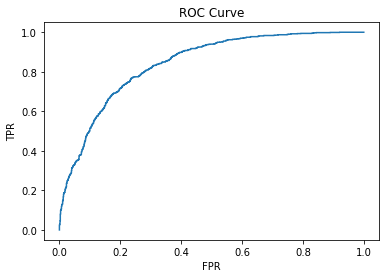

In [49]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('ROC Curve')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(train_x,train_y))
plt.show()

In [50]:
y_train_pred=model_lr.predict(train_x)

In [51]:
validation(train_y,y_train_pred)    # Train Accuracy

Confusion Matrix
 [[3045 1089]
 [ 878 3266]]

Accuracy: 0.7623822179270355

Recall : 0.7881274131274131

Precision : 0.7499425947187142

F1 Score : 0.768561007177315


In [52]:
validation(test_y,pred_y_lr)       # Test Accuracy

Confusion Matrix
 [[757 283]
 [214 816]]

Accuracy: 0.759903381642512

Recall : 0.7922330097087379

Precision : 0.7424931756141947

F1 Score : 0.7665570690465008


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'n_estimators':[120,130,140,150,160], 'max_depth':[4,5,6,7], 'criterion':['entropy']}

gscv= GridSearchCV(estimator=RandomForestClassifier(),param_grid=params, scoring='accuracy', verbose=1,cv=2)

In [55]:
gscv.fit(train_x,train_y)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6, 7],
                         'n_estimators': [120, 130, 140, 150, 160]},
             scoring='accuracy', verbose=1)

In [56]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 120}

In [57]:
model_rf=RandomForestClassifier(**gscv.best_params_)

In [58]:
model_rf.fit(train_x,train_y)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=120)

In [59]:
y_pred_rf=model_rf.predict(test_x)

In [60]:
validation(test_y,y_pred_rf)

Confusion Matrix
 [[760 280]
 [174 856]]

Accuracy: 0.7806763285024154

Recall : 0.8310679611650486

Precision : 0.7535211267605634

F1 Score : 0.7903970452446907


In [61]:
y_pred_rf_soft = model_rf.predict_proba(test_x)

In [62]:
y_pred_rf_soft[:,1]

array([0.32324598, 0.11493979, 0.73442797, ..., 0.51125394, 0.3360141 ,
       0.83328607])

In [63]:
# Plot ROC and AUC curve

fpr_rf,tpr_rf,threshold_rf=roc_curve(test_y,y_pred_rf_soft[:,1])

LR AUC 0.7600588125466766 LR Model Score 0.7623822179270355
RF AUC 0.7809185959671396 RF Model Score 0.7980188451316743


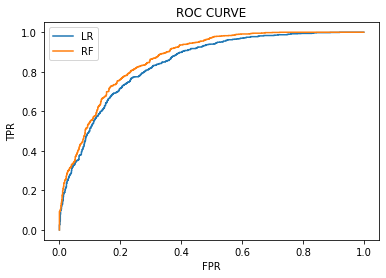

In [64]:
plt.plot(fpr,tpr, label='LR')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(train_x,train_y))
print('RF AUC',roc_auc_score(test_y,y_pred_rf),'RF Model Score',model_rf.score(train_x,train_y))
plt.show()

LR AUC 0.7600588125466766 LR Model Score 0.759903381642512
RF AUC 0.7809185959671396 RF Model Score 0.7806763285024154


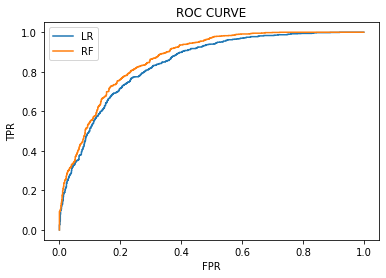

In [65]:
# Test data
plt.plot(fpr,tpr, label='LR')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
print('LR AUC',roc_auc_score(test_y,pred_y_lr),'LR Model Score',model_lr.score(test_x,test_y))
print('RF AUC',roc_auc_score(test_y,y_pred_rf),'RF Model Score',model_rf.score(test_x,test_y))
plt.show()

## ADA Boost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

params = {'n_estimators':[50,60,70,80,100]}


In [67]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),
                       param_grid=params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)


In [68]:
gscv_ada.fit(x,y)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 60, 70, 80, 100]},
             scoring='accuracy', verbose=1)

In [69]:
gscv_ada.best_params_

{'n_estimators': 80}

In [70]:
model_ada = AdaBoostClassifier(**gscv_ada.best_params_)

In [71]:
model_ada.fit(train_x,train_y)

AdaBoostClassifier(n_estimators=80)

In [72]:
model_ada.score(test_x,test_y)

0.7782608695652173

## Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
params = {'learning_rate':[0.01,1],
         'n_estimators':[160,170,180],
         'max_depth':[4,5,6]}

In [75]:
gscv_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                       param_grid=params,
                       scoring='accuracy',
                       verbose=1,
                      cv=2)


In [76]:
gscv_gb.fit(x,y)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 1], 'max_depth': [4, 5, 6],
                         'n_estimators': [160, 170, 180]},
             scoring='accuracy', verbose=1)

In [77]:
gscv_gb.best_params_

{'learning_rate': 1, 'max_depth': 6, 'n_estimators': 180}

In [78]:
model_gb=GradientBoostingClassifier(**gscv_gb.best_params_)

In [79]:
model_gb.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=1, max_depth=6, n_estimators=180)

In [80]:
model_gb.score(test_x,test_y)

0.8893719806763285

In [81]:
y_pred_gb = model_gb.predict(test_x)

In [82]:
validation(test_y,y_pred_gb)

Confusion Matrix
 [[860 180]
 [ 49 981]]

Accuracy: 0.8893719806763285

Recall : 0.9524271844660194

Precision : 0.8449612403100775

F1 Score : 0.895481515289822


## XG Boost

In [83]:
from xgboost import XGBClassifier

In [84]:
xgb = XGBClassifier()

In [85]:
params={'n_estimators':[10,20,30]}

In [86]:
gscv_xgb = GridSearchCV(estimator=xgb,
                       param_grid= params,
                       scoring='accuracy',
                       verbose=1,
                       cv=2)

In [87]:
gscv_xgb.fit(x,y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[14:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:44] 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'n_estimators': [10, 20, 30]}, scoring='accuracy',
             verbose=1)

In [88]:
gscv_xgb.best_params_

{'n_estimators': 30}

In [89]:
model_xgb = XGBClassifier(**gscv_xgb.best_params_)

In [90]:
model_xgb.fit(train_x,train_y)

[14:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
model_xgb.score(test_x,test_y)

0.8193236714975846

In [92]:
y_pred_xgb = model_xgb.predict(test_x)

In [93]:
validation(test_y,y_pred_xgb)

Confusion Matrix
 [[796 244]
 [130 900]]

Accuracy: 0.8193236714975846

Recall : 0.8737864077669902

Precision : 0.7867132867132867

F1 Score : 0.8279668813247469


## Support Vector Classifier

In [94]:
from sklearn.svm import SVC

In [95]:
model_svc=SVC(kernel='rbf')

In [96]:
model_svc.fit(train_x,train_y)

SVC()

In [97]:
y_pred_svc=model_svc.predict(test_x)

In [98]:
validation(y_pred_svc,test_y)

Confusion Matrix
 [[729 415]
 [311 615]]

Accuracy: 0.6492753623188405

Recall : 0.6641468682505399

Precision : 0.5970873786407767

F1 Score : 0.6288343558282208
